Galaxy=  MW
----time_aux listo -----
time =  2.160396
snap =  0160


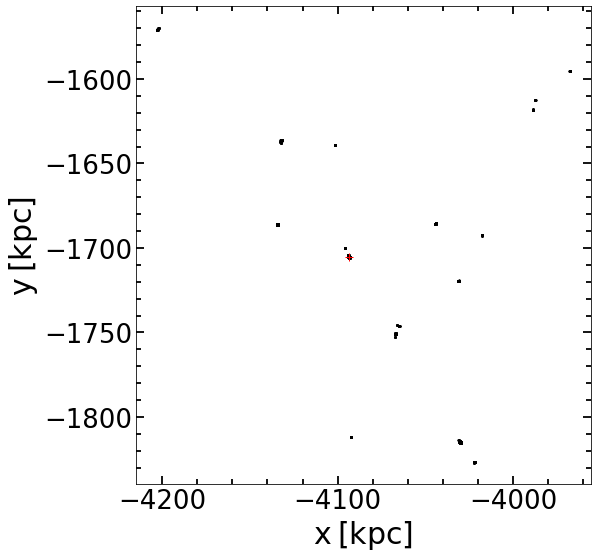

time =  1.946152
snap =  0144


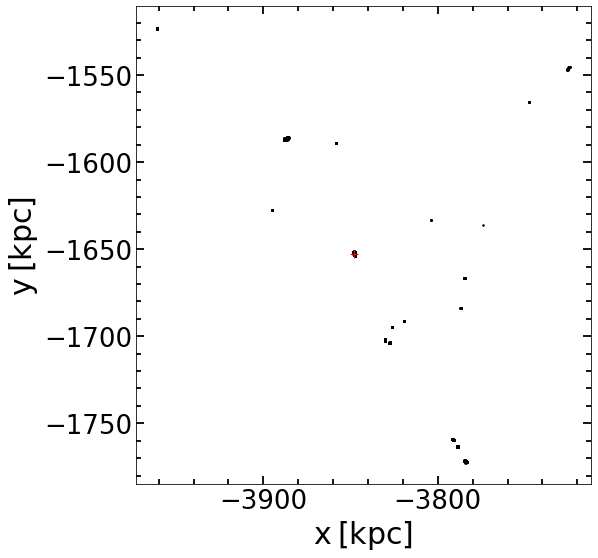

time =  1.731908
snap =  0128


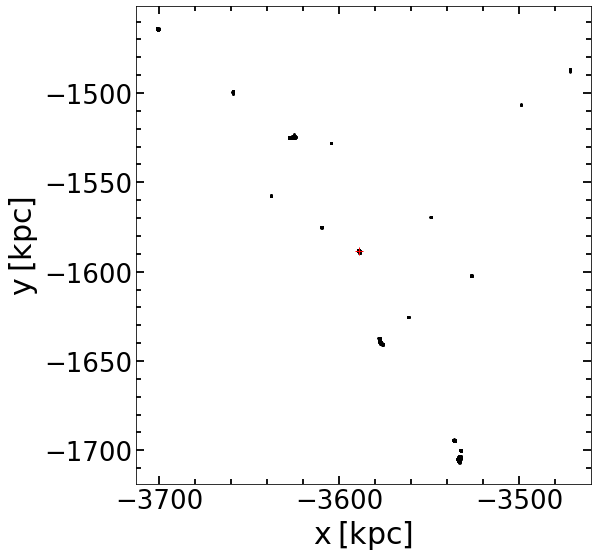

time =  1.517664
snap =  0112


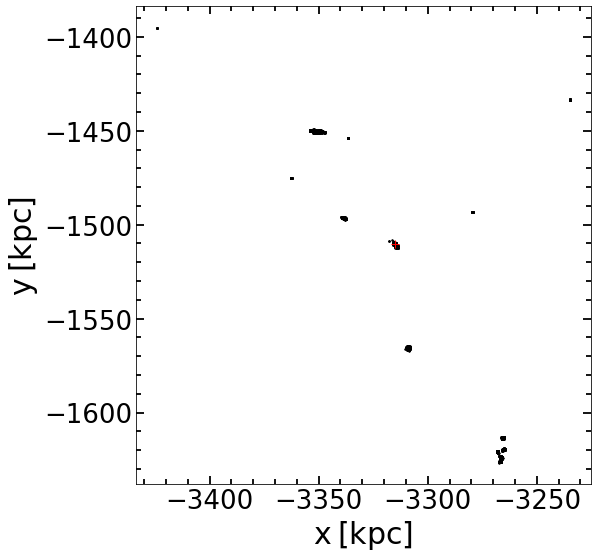

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pynbody
from joblib import Parallel, delayed
# from __future__ import unicode_literals

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

#------------------------------------------------------------------------
vector2 = ('M31', 'MW', 'M33')

path2 = '/z/omarioni/Barras_GdGs/erebos/pyprogram/_data/'

path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/'

for l in range(1,2):
    
    print 'Galaxy= ', str('%s'%vector2[l]) 
    
    file = np.loadtxt(path2 + str('%s'%vector2[l]) +'_tform_z0.dat')
    # file = np.loadtxt(path2 + 'M33_tform_z0_2.dat')
    ID    = file[:,0]
    tform = file[:,2]

    sort = np.argsort(tform)

    sort_tform = tform[sort][::-1]
    sort_ID    = ID[sort][::-1]

#     file2 = np.loadtxt(path2 + 'M33_masscenter.dat')
    file2 = np.loadtxt(path2 + str('%s'%vector2[l]) +'_masscenter.dat')
    
    time = file2[:,0]
    xcm  = file2[:,1]
    ycm  = file2[:,2]
    zcm  = file2[:,3]
    
    time_aux = np.zeros(len(ID))
    
    k = 1
    
    for i in range(0,len(ID)):
        if sort_tform[i] > time[0]:
            time_aux[i] = time[0]
            continue
            
        if sort_tform[i] < time[-1]:
            time_aux[i] = time[-1]
            continue
            
        for j in range(k, len(time)):
            
            if  sort_tform[i] > time[j]:
                time_aux[i] = time[j-1]
    #             print time_aux[i]
                if time_aux[i] < time_aux[i-1]:
                    k = k + 1
                break
                
    print '----time_aux listo -----'
    
    
    snapshot = np.loadtxt('/z/omarioni/snapshots.txt', dtype='string') #SNAPSHOTS
    isnap = snapshot[::-1]

#     archivo = open(path2 + 'M33_tform_particles.dat', 'a')
#     archivo = open(path2 + str('%s'%vector2[l]) +'_tform_particles.dat', 'a')
    
    
    for i in range(55, len(time)):

        mask, = np.where(time_aux == time[i])

        if len(mask) == 0:
            continue

        s = pynbody.load(path + str('%s'%isnap[i])+'/WMAP3.CLUES.HR.00'+ str('%s'%isnap[i]))

        pstr = s.star['pos'].in_units('kpc')
        IDs  = s.star['iord']
        tf   = s.star['tform'].in_units('Gyr')

        particles = np.isin(IDs, np.int_(sort_ID[mask]))

#         xstr = (pstr[:,0][particles]-xcm[i])
#         ystr = (pstr[:,1][particles]-ycm[i])
#         zstr = (pstr[:,2][particles]-zcm[i])

#         rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)
        
        print 'time = ', time[i]
        print 'snap = ', isnap[i]
        #--------------------plot ---------------------------

        fig=plt.figure(i, figsize=(8,8))
        fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
        ax=fig.add_subplot(111)
        # ax.plot(tform ,rz0,'.k', markersize=0.1)
        ax.plot(pstr[:,0][particles] ,pstr[:,1][particles],'.k', markersize=3)
        ax.plot(xcm[i] ,ycm[i],'+r', markersize=8)
        ax.set_ylabel(r'$\mathrm{y\:[kpc]}$', fontsize=30)
        ax.set_xlabel(r'$\mathrm{x\:[kpc]}$',fontsize=30)
        ax.minorticks_on()
        ax.tick_params( labelsize=26)
        ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
        ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
        plt.show()
        